In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [58]:
# get csv file
df = pd.read_csv('./Analyze_code/0809/16:00:10_swarm.csv')
# axes: timestamp, uri, x, y, z, accx, accy, accz
# add titles of each axes: time, uri, x, y, z, accx, accy, accz
df.columns = ['time', 'uri', 'x', 'y', 'z', 'accx', 'accy', 'accz']
df.describe()
df.head()


,time,uri,x,y,z,accx,accy,accz
0,1023359,radio://0/80/2M/E7E7E7E703,1.026019,0.008444,0.004161,-0.014644,0.010118,1.002584
1,17959,radio://0/80/2M/E7E7E7E70C,-1.009126,-0.985644,0.015668,0.006274,-0.003080,0.999570
2,1050022,radio://0/80/2M/E7E7E7E705,0.965758,-1.038464,-0.007900,0.009301,0.020352,1.001652
3,801009,radio://0/80/2M/E7E7E7E70A,-0.057048,-1.039368,-0.032770,0.002587,0.007480,0.996737
4,1040462,radio://0/80/2M/E7E7E7E701,0.001945,-0.050570,-0.012554,-0.000696,0.000845,0.999248


In [59]:
# divide the log by uris
uris = df['uri'].unique()
# change uri to uri's last 4 digits
df['uri'] = df['uri'].apply(lambda x: x[-4:])
# save init_times from the first timestamps of each uri
init_times = df.groupby('uri')['time'].min().to_dict()
# df['time'] = (df['time'] - df['uri'].map(init_times))

df.sort_values(by=['uri', 'time'], inplace=True)
# create separate dataframes for each uri
dfs = [df[df['uri'] == uri] for uri in uris]

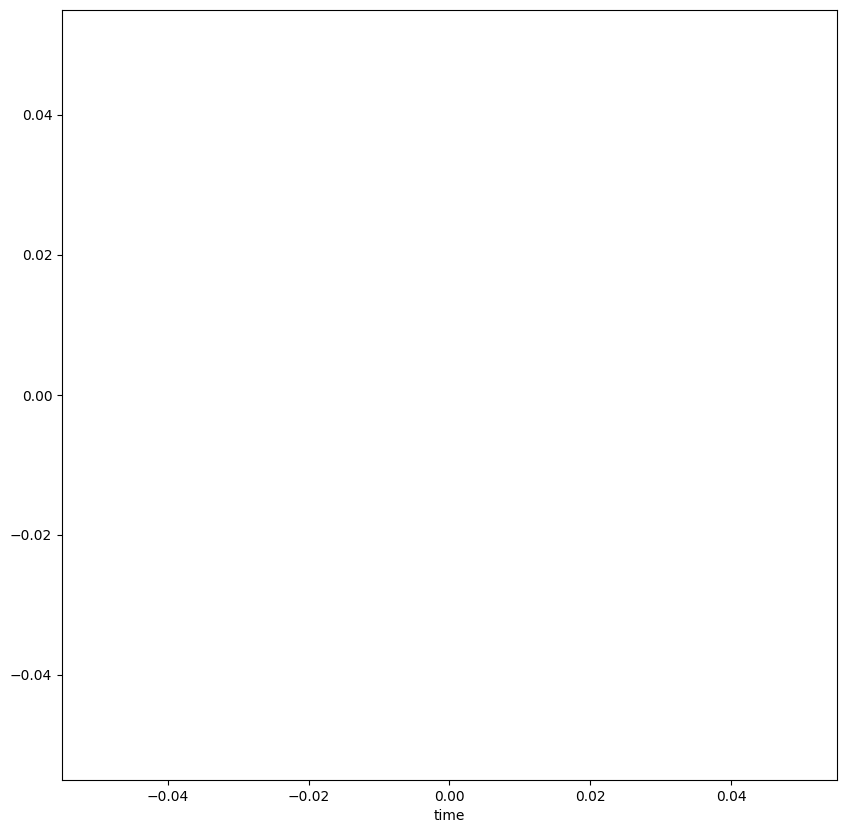

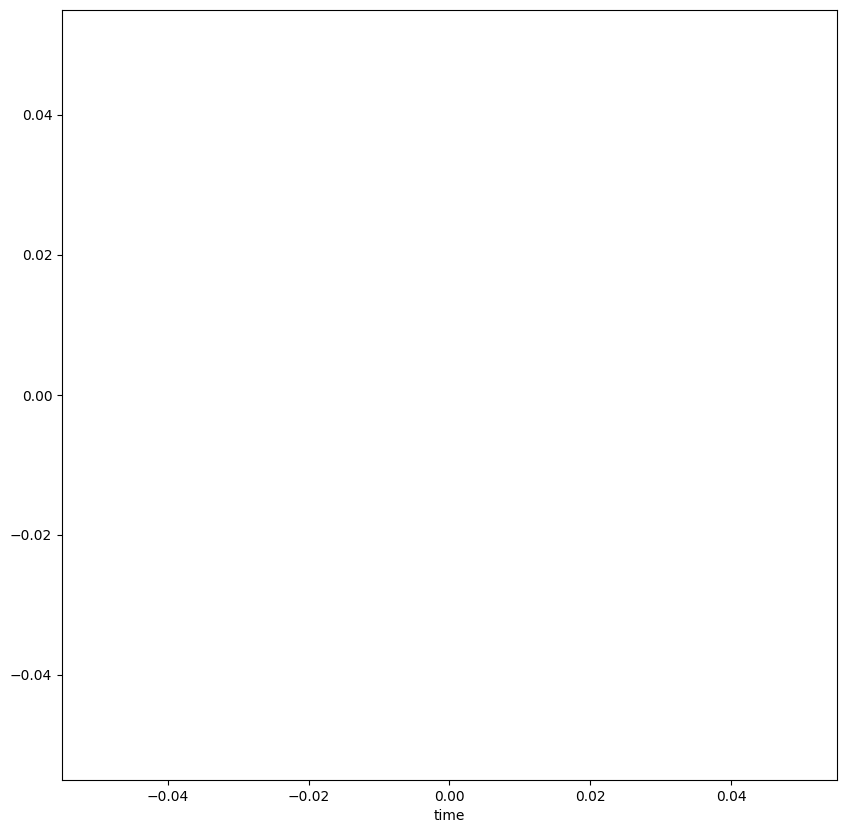

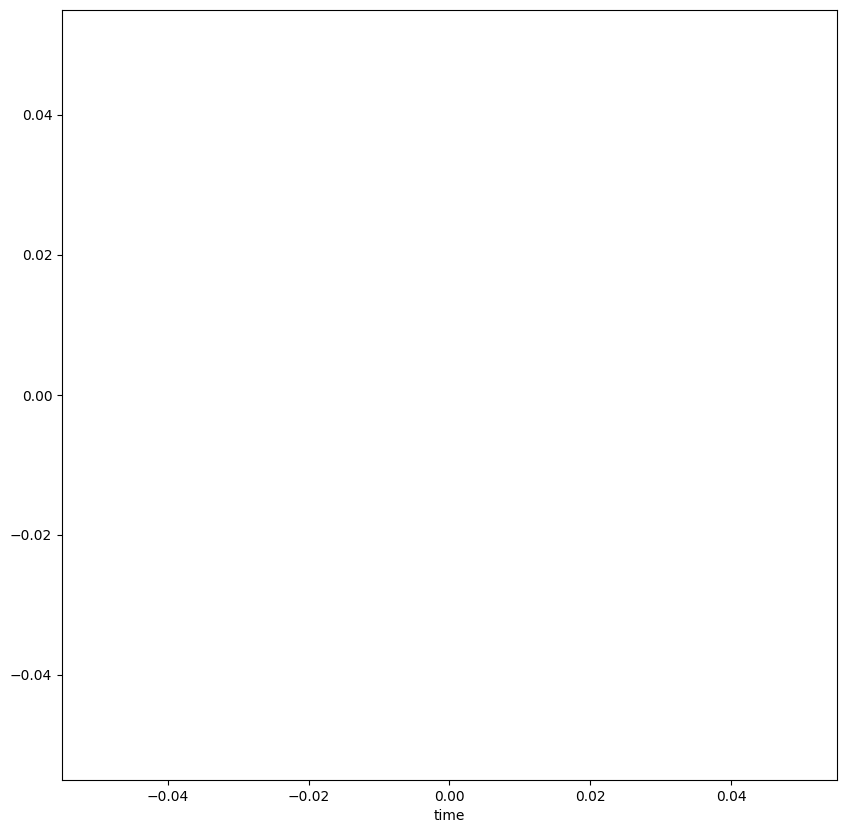

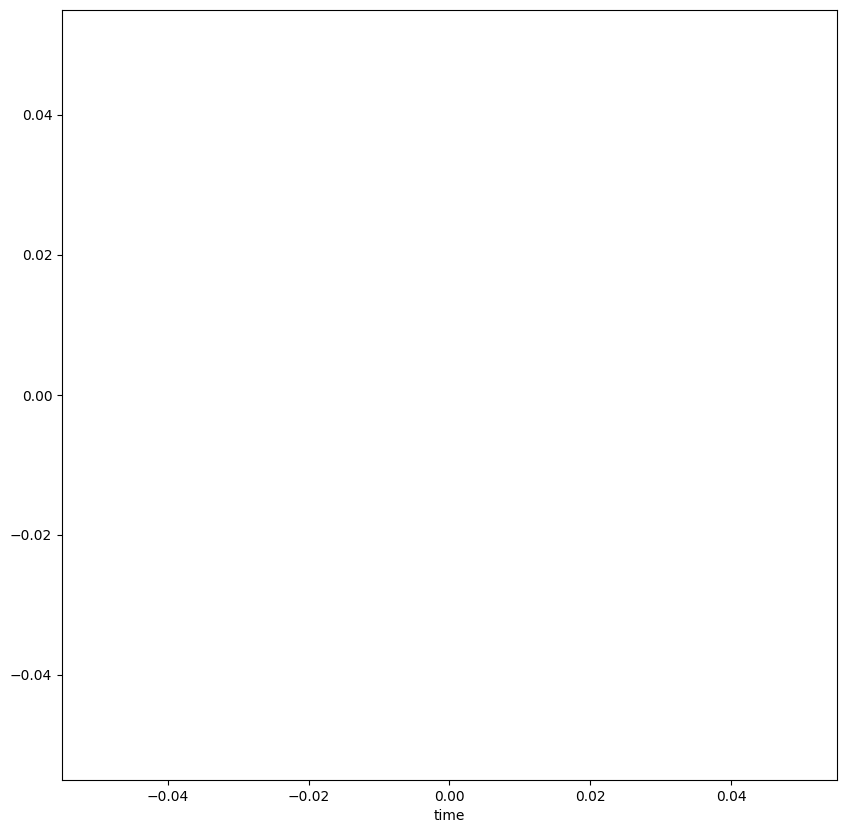

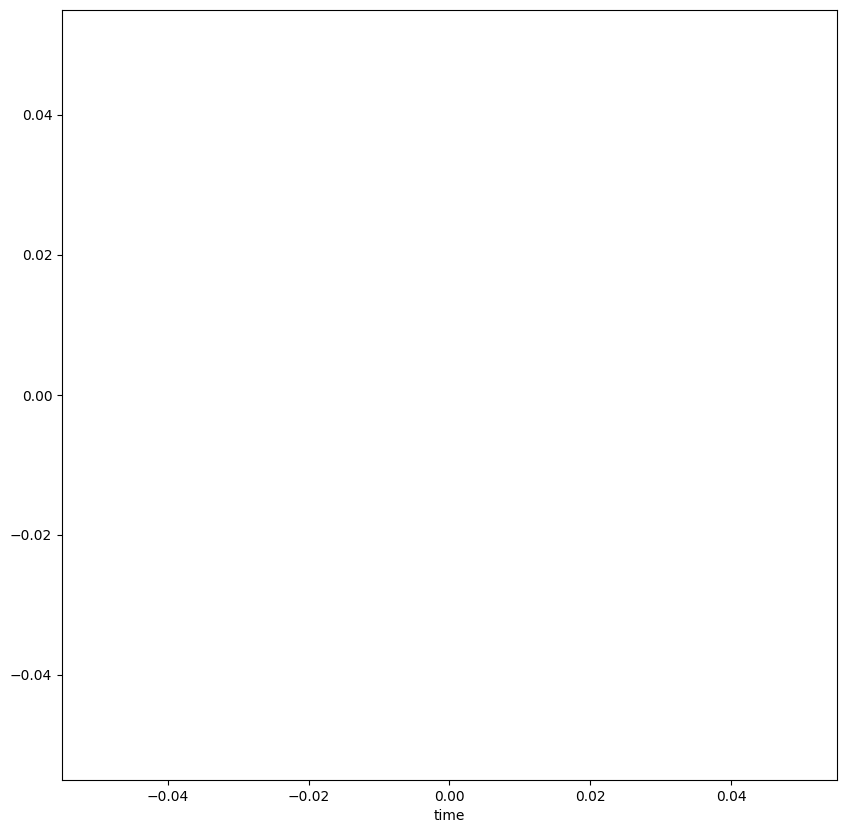

In [60]:
# plot x-t, y-t, z-t for each uris
for i in range(len(uris)):
    # plot x-t, y-t, z-t as subplots, horizontally.
    plt.figure(figsize=(10, 10))
    # plt.subplot(1, 3, 1)
    plt.plot(dfs[i]['time'], dfs[i]['accx'], label='x')
    # plt.xlabel('time')
    # plt.subplot(1,3,2)
    plt.plot(dfs[i]['time'], dfs[i]['accy'], label='y')
    # plt.xlabel('time')
    # plt.subplot(1,3,3)
    plt.plot(dfs[i]['time'], dfs[i]['accz'], label='z')
    plt.xlabel('time')
    plt.show()
